In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import kagglehub

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.feature_extraction import FeatureHasher
from sklearn.metrics import root_mean_squared_error

from tqdm.auto import tqdm

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import xgboost as xgb


/Users/sethurama/Library/Caches/pypoetry/virtualenvs/mlzc-reg-movies-KQhlauYI-py3.13/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
## SOURCE DATA

# Download latest version
# path = kagglehub.dataset_download("asaniczka/tmdb-movies-dataset-2023-930k-movies")
# print("Path to dataset files:", path)

### Description 
```
To train an ML model for predicting the movie rating based on input data 
(like movie title, release year, runtime, revenue, overview, popularity and other features)

```

In [3]:
# !cp  /Users/sethurama/.cache/kagglehub/datasets/asaniczka/tmdb-movies-dataset-2023-930k-movies/versions/389/TMDB_movie_dataset_v11.csv tmdb-movies.csv

In [7]:
# Read CSV and analyse 

df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


In [5]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,1131286,1131287,1131288,1131289,1131290,1131291,1131292,1131293,1131294,1131295
id,27205,157336,155,19995,24428,293660,299536,550,118340,680,...,730597,730598,730600,730601,730604,730605,730606,730609,730610,1386588
title,Inception,Interstellar,The Dark Knight,Avatar,The Avengers,Deadpool,Avengers: Infinity War,Fight Club,Guardians of the Galaxy,Pulp Fiction,...,Anal Slut Training,На спине у чёрного кота,Hello! Project DVD Magazine Vol.19,EmBlem,A Royal Divorce,The Good Wolf,Hello! Project DVD Magazine Vol.20,Muhammad Ali - Rumble in the Jungle,Hello! Project DVD Magazine Vol.21,Their Great Big Beautiful Doll
vote_average,8.364,8.417,8.512,7.573,7.71,7.606,8.255,8.438,7.906,8.488,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
vote_count,34495,32571,30619,29815,29166,28894,27713,27238,26638,25893,...,0,0,0,0,0,0,0,0,0,0
status,Released,Released,Released,Released,Released,Released,Released,Released,Released,Released,...,Released,Released,Released,Released,Released,Released,Released,Released,Released,Released
release_date,2010-07-15,2014-11-05,2008-07-16,2009-12-15,2012-04-25,2016-02-09,2018-04-25,1999-10-15,2014-07-30,1994-09-10,...,2019-04-29,2008-06-01,2009-07-18,2019-06-21,1938-09-21,NaN,2010-01-02,2016-06-04,2010-01-05,NaN
revenue,825532764,701729206,1004558444,2923706026,1518815515,783100000,2052415039,100853753,772776600,213900000,...,0,0,0,0,0,0,0,0,0,0
runtime,148,169,152,162,143,108,149,139,121,154,...,216,0,82,25,85,90,53,0,81,0
adult,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
backdrop_path,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,/en971MEXui9diirXlogOrPKmsEn.jpg,/mDfJG3LC3Dqb67AZ52x3Z0jU0uB.jpg,/hZkgoQYus5vegHoetLkCJzb17zJ.jpg,/uLtVbjvS1O7gXL8lUOwsFOH4man.jpg,/suaEOtk1N1sgg2MTM7oZd2cfVp3.jpg,...,/coN8KNj4bX0dGER3MbW3foQSfyO.jpg,NaN,/ebKCAx4GWvG0FXn0TcumuMFsabm.jpg,NaN,/MmbewBfrIdOhgmF7uJ9bdYFpAB.jpg,NaN,/eivFngK719NlRG8kpL0hrpUDcii.jpg,NaN,/dzz4neKyFbb4SKD1QPARhs6FCHK.jpg,NaN


## EDA

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1131296 entries, 0 to 1131295
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1131296 non-null  int64  
 1   title                 1131283 non-null  object 
 2   vote_average          1131296 non-null  float64
 3   vote_count            1131296 non-null  int64  
 4   status                1131296 non-null  object 
 5   release_date          946646 non-null   object 
 6   revenue               1131296 non-null  int64  
 7   runtime               1131296 non-null  int64  
 8   adult                 1131296 non-null  bool   
 9   backdrop_path         300636 non-null   object 
 10  budget                1131296 non-null  int64  
 11  homepage              119899 non-null   object 
 12  imdb_id               601319 non-null   object 
 13  original_language     1131296 non-null  object 
 14  original_title        1131283 non-

In [11]:
df.isna().mean()

id                      0.000000
title                   0.000011
vote_average            0.000000
vote_count              0.000000
status                  0.000000
release_date            0.163220
revenue                 0.000000
runtime                 0.000000
adult                   0.000000
backdrop_path           0.734255
budget                  0.000000
homepage                0.894016
imdb_id                 0.468469
original_language       0.000000
original_title          0.000011
overview                0.202135
popularity              0.000000
poster_path             0.314400
tagline                 0.859757
genres                  0.400057
production_companies    0.548238
production_countries    0.442191
spoken_languages        0.425539
keywords                0.728418
dtype: float64

In [12]:
df.shape

(1131296, 24)

In [13]:

cols_of_interest = ['title','vote_average', 'vote_count', 'status', 'release_date', 'revenue', 'runtime', 'adult', 'budget', 'original_title',
                    'overview', 'popularity', 'genres', 'production_companies', 'production_countries', 'spoken_languages', 'keywords']
cols_of_interest

['title',
 'vote_average',
 'vote_count',
 'status',
 'release_date',
 'revenue',
 'runtime',
 'adult',
 'budget',
 'original_title',
 'overview',
 'popularity',
 'genres',
 'production_companies',
 'production_countries',
 'spoken_languages',
 'keywords']

In [14]:
df = df[cols_of_interest]

In [15]:
df.head()

,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,original_title,overview,popularity,genres,production_companies,production_countries,spoken_languages,keywords
0,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,160000000,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,165000000,Interstellar,The adventures of a group of explorers who mak...,140.241,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,185000000,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,237000000,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,220000000,The Avengers,When an unexpected enemy emerges and threatens...,98.082,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


In [16]:
for col in df.columns:
    print(df[col].head(2))
    print(f"N Uniques: {df[col].nunique()}")
    print()

0       Inception
1    Interstellar
Name: title, dtype: object
N Uniques: 970628

0    8.364
1    8.417
Name: vote_average, dtype: float64
N Uniques: 5024

0    34495
1    32571
Name: vote_count, dtype: int64
N Uniques: 3598

0    Released
1    Released
Name: status, dtype: object
N Uniques: 6

0    2010-07-15
1    2014-11-05
Name: release_date, dtype: object
N Uniques: 42700

0    825532764
1    701729206
Name: revenue, dtype: int64
N Uniques: 14292

0    148
1    169
Name: runtime, dtype: int64
N Uniques: 755

0    False
1    False
Name: adult, dtype: bool
N Uniques: 2

0    160000000
1    165000000
Name: budget, dtype: int64
N Uniques: 5708

0       Inception
1    Interstellar
Name: original_title, dtype: object
N Uniques: 1004344

0    Cobb, a skilled thief who commits corporate es...
1    The adventures of a group of explorers who mak...
Name: overview, dtype: object
N Uniques: 877385

0     83.952
1    140.241
Name: popularity, dtype: float64
N Uniques: 19888

0    Action, Scienc

In [17]:
# => There are a lot of categorical fields with high dimensionality. 

In [18]:
df.isna().sum()

title                       13
vote_average                 0
vote_count                   0
status                       0
release_date            184650
revenue                      0
runtime                      0
adult                        0
budget                       0
original_title              13
overview                228675
popularity                   0
genres                  452583
production_companies    620220
production_countries    500249
spoken_languages        481411
keywords                824056
dtype: int64

## Target Val Analysis

In [24]:
int(df.vote_average.min()), int(df.vote_average.max())

(0, 10)

In [25]:
mean_rating = df.vote_average.mean()
mean_rating

np.float64(1.8877785486733798)

In [26]:
df[df.vote_average > 0].vote_average.mean()

np.float64(6.100493381437174)

In [27]:
len(df[df.vote_average > 0]) / len(df)

0.3094468644810907

In [28]:
## Data for only vote_average. 
ndf = df[df.vote_average <= 0]
df = df[df.vote_average > 0]

### => Exclude data points where target value is missing.  vote_average 

In [29]:
df.isna().sum()

title                        0
vote_average                 0
vote_count                   0
status                       0
release_date              7038
revenue                      0
runtime                      0
adult                        0
budget                       0
original_title               0
overview                 37966
popularity                   0
genres                   59316
production_companies    122984
production_countries     78269
spoken_languages         66515
keywords                186474
dtype: int64

In [32]:
### Introduce release_year feature and delete release_date

df['release_year'] = pd.to_datetime(df.release_date).dt.year
mean_year = df.release_year.mean()
df['release_year'] = df.release_year.fillna(mean_year)

del df['release_date']

### Prepare data 

In [33]:
# Fill NA with null

In [35]:
df['title'] = df.title.fillna('')
df['original_title'] = df.original_title.fillna('')
df['overview'] = df.overview.fillna('')
df['genres'] = df.genres.fillna('')
df['production_companies'] = df.production_companies.fillna('')
df['production_countries'] = df.production_countries.fillna('')
df['spoken_languages'] = df.spoken_languages.fillna('')
df['keywords'] = df.keywords.fillna('')



In [36]:
df = df.replace(0, np.nan)
df.isna().sum()



title                        0
vote_average                 0
vote_count                 539
status                       0
revenue                 333319
runtime                  44908
adult                        0
budget                  322848
original_title               0
overview                     0
popularity                3338
genres                       0
production_companies         0
production_countries         0
spoken_languages             0
keywords                     0
release_year                 0
dtype: int64

In [37]:
# Impute numericals with mean values 

In [38]:
for col in ['vote_count', 'runtime', 'budget', 'revenue', 'popularity']:
    col_mean = df[col].mean()
    df[col] = df[col].fillna(col_mean)


In [39]:
df.isna().sum()

title                   0
vote_average            0
vote_count              0
status                  0
revenue                 0
runtime                 0
adult                   0
budget                  0
original_title          0
overview                0
popularity              0
genres                  0
production_companies    0
production_countries    0
spoken_languages        0
keywords                0
release_year            0
dtype: int64

<Axes: xlabel='vote_average', ylabel='Count'>

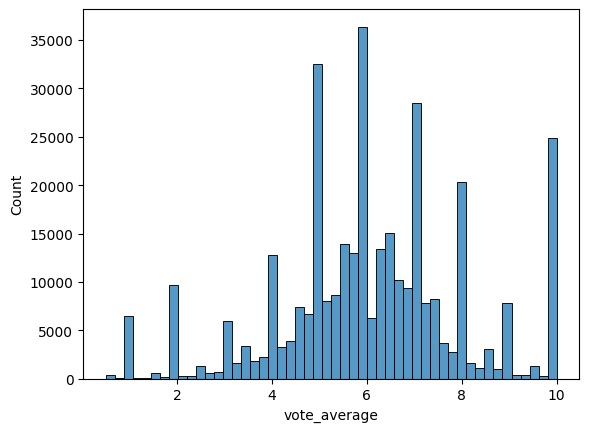

In [40]:
sns.histplot(df.vote_average, bins=50)

In [41]:
df.release_year

0          2010.0
1          2014.0
2          2008.0
3          2009.0
4          2012.0
            ...  
1126722    2014.0
1126980    2017.0
1128908    1996.0
1130206    2021.0
1130860    2020.0
Name: release_year, Length: 350076, dtype: float64

In [42]:
df.spoken_languages.value_counts()[:50]

spoken_languages
English                113009
                        66515
Spanish                 17537
French                  16784
Japanese                12459
German                  10766
No Language              9030
Italian                  8007
Russian                  6265
Portuguese               5891
Mandarin                 4732
Korean                   4038
Hindi                    3316
Turkish                  2303
Swedish                  2218
Czech                    2200
English, French          2127
Tamil                    2086
Cantonese                2036
Arabic                   2006
Dutch                    1968
Danish                   1917
Greek                    1856
Polish                   1785
Malayalam                1775
English, Spanish         1713
Tagalog                  1406
Telugu                   1307
Finnish                  1286
Indonesian               1111
Thai                     1093
English, Italian         1092
Persian                

In [43]:
# Train a model to predict the movie rating (vote_average) for a new movie. 

In [44]:
# Split data.

In [45]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)


In [46]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

df_train.shape, df_val.shape, df_test.shape

((210045, 17), (70015, 17), (70016, 17))

In [47]:
y_train = df_train['vote_average'].values
y_val = df_val['vote_average'].values
y_test = df_test['vote_average'].values

del df_train['vote_average']
del df_val['vote_average']
del df_test['vote_average']


In [48]:
df_train.shape, df_val.shape, df_test.shape

((210045, 16), (70015, 16), (70016, 16))

In [49]:
# Due to high dimensionality, using FeatureHasher and not using DictVectorizer as it suits high cardinality categorical features.

In [50]:
hasher = FeatureHasher(n_features=25, input_type='dict')


In [51]:
train_dicts = df_train.to_dict(orient='records')
val_dicts = df_val.to_dict(orient='records')

In [52]:
X_train = hasher.fit_transform(train_dicts)
X_val = hasher.transform(val_dicts)

In [53]:
X_train.shape, X_val.shape

((210045, 25), (70015, 25))

###  Linear regression 

In [54]:

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [55]:
y_pred = model.predict(X_val)

In [56]:
rmse = root_mean_squared_error(y_val, y_pred)
rmse

np.float64(1.968903312494201)

In [57]:
for nf in [10, 25, 50, 100]:
    hasher = FeatureHasher(n_features=nf, input_type='dict')
    
    train_dicts = df_train.to_dict(orient='records')
    val_dicts = df_val.to_dict(orient='records')
    
    X_train = hasher.fit_transform(train_dicts)
    X_val = hasher.transform(val_dicts)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)

    rmse = root_mean_squared_error(y_val, y_pred)
    print(f"{nf}_features : rmse({rmse})")

10_features : rmse(1.968903283653434)
25_features : rmse(1.968903312494201)
50_features : rmse(1.9689032941211415)
100_features : rmse(1.9689032941154538)


In [59]:
# For Lasso Regression

for nf in [10, 25, 50, 75, 100]:
    hasher = FeatureHasher(n_features=nf, input_type='dict')
    
    train_dicts = df_train.to_dict(orient='records')
    val_dicts = df_val.to_dict(orient='records')
    
    X_train = hasher.fit_transform(train_dicts)
    X_val = hasher.transform(val_dicts)

    model = Lasso(alpha=0.1)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)

    rmse = root_mean_squared_error(y_val, y_pred)
    print(f"{nf}_features : rmse({rmse})")

10_features : rmse(1.9452099188472436)
25_features : rmse(1.9648308962135845)
50_features : rmse(1.942581170723862)
75_features : rmse(1.9425221710207812)
100_features : rmse(1.9425326647847518)


### => n_features for FeatureHasher can be kept 50

In [60]:
def prep():
    hasher = FeatureHasher(n_features=50, input_type='dict')
    
    train_dicts = df_train.to_dict(orient='records')
    val_dicts = df_val.to_dict(orient='records')
    
    X_train = hasher.fit_transform(train_dicts)
    X_val = hasher.transform(val_dicts)

    return (X_train, X_val)


In [61]:
## Trees


In [62]:
X_train, X_val = prep()
X_train.shape, X_val.shape, y_train.shape

((210045, 50), (70015, 50), (210045,))

In [63]:
dtr = DecisionTreeRegressor(
    max_depth=5
)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [64]:
y_pred = dtr.predict(X_val)
rmse = root_mean_squared_error(y_val, y_pred)
rmse

np.float64(1.8880494580578018)

In [65]:
for d in [3, 5, 7, 10, 15, 20]:
    dtr = DecisionTreeRegressor(
        max_depth=d
    )
    dtr.fit(X_train, y_train)
    y_pred = dtr.predict(X_val)
    rmse = root_mean_squared_error(y_val, y_pred)
    print(f"{d}_depth : rmse({rmse})")

3_depth : rmse(1.9150748830513702)
5_depth : rmse(1.8880494580578018)
7_depth : rmse(1.859677196301983)
10_depth : rmse(1.8430058442382913)
15_depth : rmse(1.8909054083322563)
20_depth : rmse(2.0347037170367646)


In [66]:
### Best max_depth for a DT. d = 10


In [67]:
scores = []
for d in tqdm([5, 10, 15, 20]):
    for s in [10, 20, 50, 100, 200, 500]:
        dtr = DecisionTreeRegressor(
            max_depth=d,
            min_samples_leaf=s
        )
        dtr.fit(X_train, y_train)
        y_pred = dtr.predict(X_val)
        rmse = root_mean_squared_error(y_val, y_pred)
        # print(f"{d}_depth , {s:4d: rmse({rmse})")

        scores.append((d, s, rmse))
        

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [01:50<00:00, 27.70s/it]


In [68]:
cols = ['max_depth', 'min_samples_leaf', 'rmse']
df_scores = pd.DataFrame(scores, columns=cols)
df_scores

,max_depth,min_samples_leaf,rmse
0,5,10,1.887940
1,5,20,1.887940
2,5,50,1.887909
3,5,100,1.888325
4,5,200,1.888147
5,5,500,1.887938
6,10,10,1.838198
7,10,20,1.835624
8,10,50,1.833716
9,10,100,1.832558


In [69]:
df_scores_pivot = df_scores.pivot(index='max_depth', columns=['min_samples_leaf'], values=['rmse'])
df_scores_pivot.round(3)

rmse                                   
min_samples_leaf    10     20     50     100    200    500
max_depth                                                 
5                 1.888  1.888  1.888  1.888  1.888  1.888
10                1.838  1.836  1.834  1.833  1.833  1.838
15                1.848  1.832  1.824  1.819  1.820  1.828
20                1.899  1.860  1.830  1.819  1.818  1.827

<Axes: xlabel='None-min_samples_leaf', ylabel='max_depth'>

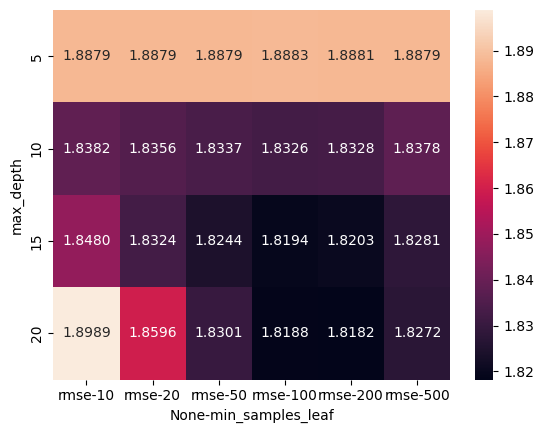

In [70]:
sns.heatmap(df_scores_pivot, annot=True, fmt='.4f')

In [71]:
# With depth=15, min_samples_leaf=100 .. RMSE=1.8208

## Random Forest

In [72]:
rfr = RandomForestRegressor(
        random_state=1,
        n_estimators=10,
        max_depth=15,
        min_samples_leaf=100,
        n_jobs=-1
    )
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_val)
rmse = root_mean_squared_error(y_val, y_pred)
print(rmse)

1.8010609465628813


In [73]:
scores = []

for n in tqdm([10, 20, 50, 100]):
    rfr = RandomForestRegressor(
        random_state=1,
        n_estimators=n,
        max_depth=15,
        min_samples_leaf=100,
        n_jobs=-1
    )
    rfr.fit(X_train, y_train)
    y_pred = rfr.predict(X_val)
    rmse = root_mean_squared_error(y_val, y_pred)

    scores.append((n, rmse))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [50:09<00:00, 752.33s/it]


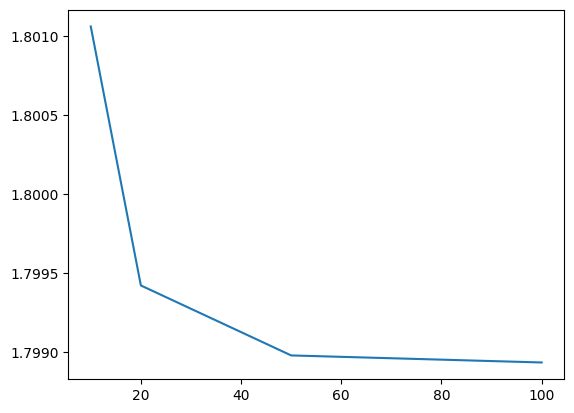

In [74]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])
plt.plot(df_scores.n_estimators, df_scores.rmse)

```
BEST config for RandomForest:

        random_state=1,
        n_estimators=50,
        max_depth=15,
        min_samples_leaf=100,
        n_jobs=-1
```


## XGBoost 

In [75]:
X_train_dense = X_train.toarray()
X_val_dense = X_val.toarray()

num_features = X_train_dense.shape[1]
features = [f"f_{i}" for i in range(num_features)]

In [76]:
dtrain = xgb.DMatrix(
    X_train,
    label=y_train,
    feature_names=features
)

dval = xgb.DMatrix(
    X_val,
    label=y_val,
    feature_names=features
)

In [77]:
xgb_params = {
    'eta': 0.5,
    'max_depth': 15,
    'min_child_weight': 100,

    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',

    'nthread': 8,

    'seed': 1,
    'verbosity': 1
}
model = xgb.train(xgb_params, dtrain, num_boost_round=15)  

In [78]:
y_pred = model.predict(dval)
root_mean_squared_error(y_val, y_pred)

np.float64(1.7940596842562018)

In [79]:
%%capture output
xgb_params = {
    'eta': 0.05,
    'max_depth': 15,
    'min_child_weight': 100,

    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',

    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
    'lambda': 1,      # L2 regularization 
    'alpha': 1,       # L1 regularization 
}
watchlist = [(dtrain, 'train'), (dval, 'val')]
model = xgb.train(
    xgb_params, 
    dtrain, 
    num_boost_round=200,
    early_stopping_rounds=10, 
    verbose_eval=5,
    evals=watchlist
) 

In [80]:
s = output.stdout.strip()
print(s)

[0]	train-rmse:1.95008	val-rmse:1.95391
[5]	train-rmse:1.88557	val-rmse:1.89508
[10]	train-rmse:1.84140	val-rmse:1.85688
[15]	train-rmse:1.80956	val-rmse:1.83134
[20]	train-rmse:1.78567	val-rmse:1.81396
[25]	train-rmse:1.76805	val-rmse:1.80241
[30]	train-rmse:1.75436	val-rmse:1.79400
[35]	train-rmse:1.74235	val-rmse:1.78808
[40]	train-rmse:1.73207	val-rmse:1.78369
[45]	train-rmse:1.72386	val-rmse:1.78071
[50]	train-rmse:1.71551	val-rmse:1.77793
[55]	train-rmse:1.70833	val-rmse:1.77604
[60]	train-rmse:1.70144	val-rmse:1.77428
[65]	train-rmse:1.69580	val-rmse:1.77306
[70]	train-rmse:1.69062	val-rmse:1.77209
[75]	train-rmse:1.68617	val-rmse:1.77123
[80]	train-rmse:1.68245	val-rmse:1.77060
[85]	train-rmse:1.68000	val-rmse:1.77018
[90]	train-rmse:1.67644	val-rmse:1.76970
[95]	train-rmse:1.67409	val-rmse:1.76917
[100]	train-rmse:1.67196	val-rmse:1.76893
[105]	train-rmse:1.66962	val-rmse:1.76885
[110]	train-rmse:1.66722	val-rmse:1.76844
[115]	train-rmse:1.66521	val-rmse:1.76818
[120]	train-rm

In [81]:
def parse_xgb_output(output):
    s = output.stdout.strip()
    
    lines = s.split('\n')
    xgb_scores = []
    for line in lines:
        r_index, r_train_rmse, r_val_rmse = line.split('\t')
        index = int(r_index.strip('[]'))
        train_rmse = float(r_train_rmse.split(':')[1])
        val_rmse = float(r_val_rmse.split(':')[1])
        xgb_scores.append((index, train_rmse, val_rmse))

    xgb_df = pd.DataFrame(xgb_scores, columns=['iter', 'train_rmse', 'val_rmse'])
    return xgb_df

In [82]:
xgb_df = parse_xgb_output(output)

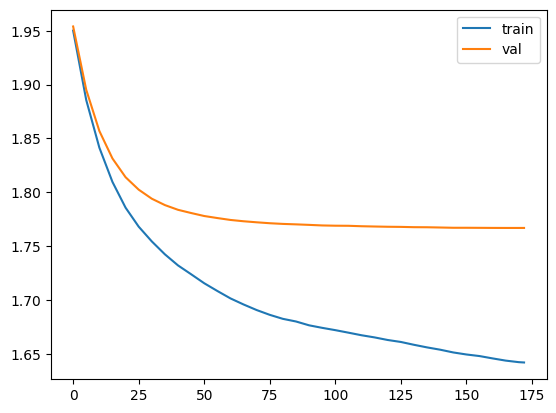

In [83]:
plt.plot(xgb_df.iter, xgb_df.train_rmse, label='train')
plt.plot(xgb_df.iter, xgb_df.val_rmse, label='val')
plt.legend()

## Parameter Tuning

In [84]:
eta_scores = {} 


In [95]:
%%capture output

xgb_params = {
    'eta': 1,
    'max_depth': 10,
    'min_child_weight': 10,

    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',

    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
    'lambda': 1,      # L2 regularization 
    'alpha': 1,       # L1 regularization 
}
watchlist = [(dtrain, 'train'), (dval, 'val')]
model = xgb.train(
    xgb_params, 
    dtrain, 
    num_boost_round=200,
    early_stopping_rounds=10, 
    verbose_eval=5,
    evals=watchlist
) 

In [96]:
key = f"eta={xgb_params['eta']}"
eta_scores[key] = parse_xgb_output(output)
eta_scores.keys()

dict_keys(['eta=0.3', 'eta=0.05', 'eta=0.1', 'eta=0.5', 'eta=1'])

In [97]:
eta_scores['eta=0.05'].head()

,iter,train_rmse,val_rmse
0,0,1.95226,1.95582
1,5,1.89621,1.90447
2,10,1.85676,1.86981
3,15,1.82859,1.84653
4,20,1.80689,1.83006


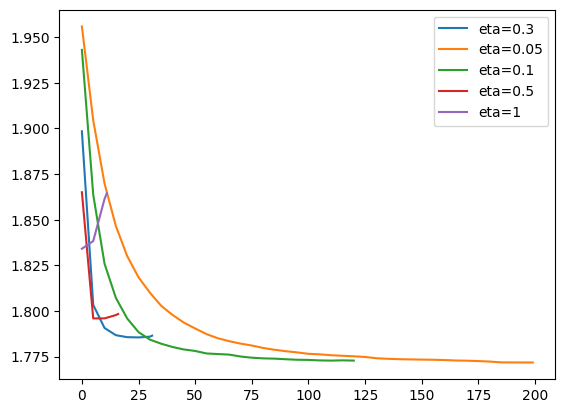

In [98]:
for key, sc_df in eta_scores.items():
    plt.plot(sc_df.iter, sc_df.val_rmse, label=key)
plt.legend()

### =>  ETA 0.1 .. Lowers the RMSE quite well

In [100]:
md_scores = {} 

In [109]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 15,
    'min_child_weight': 10,

    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',

    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
    'lambda': 1,      # L2 regularization 
    'alpha': 1,       # L1 regularization 
}
watchlist = [(dtrain, 'train'), (dval, 'val')]
model = xgb.train(
    xgb_params, 
    dtrain, 
    num_boost_round=200,
    early_stopping_rounds=10, 
    verbose_eval=5,
    evals=watchlist
) 

In [110]:
key = f"max_depth={xgb_params['max_depth']}"
md_scores[key] = parse_xgb_output(output)
md_scores.keys()

dict_keys(['max_depth=8', 'max_depth=5', 'max_depth=10', 'max_depth=15'])

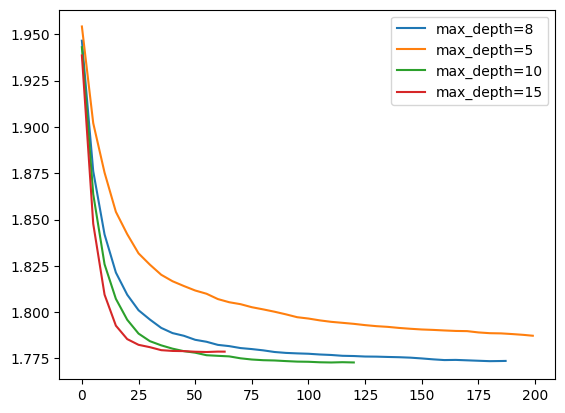

In [111]:
for key, sc_df in md_scores.items():
    plt.plot(sc_df.iter, sc_df.val_rmse, label=key)
plt.legend()

In [112]:
max_depth = 10 

In [114]:
mcw_scores = {}

In [128]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 10,
    'min_child_weight': 5,

    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',

    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
    'lambda': 1,      # L2 regularization 
    'alpha': 1,       # L1 regularization 
}
watchlist = [(dtrain, 'train'), (dval, 'val')]
model = xgb.train(
    xgb_params, 
    dtrain, 
    num_boost_round=200,
    early_stopping_rounds=10, 
    verbose_eval=5,
    evals=watchlist
) 

In [129]:
key = f"min_child_weight={xgb_params['min_child_weight']}"
mcw_scores[key] = parse_xgb_output(output)
mcw_scores.keys()

dict_keys(['min_child_weight=125', 'min_child_weight=100', 'min_child_weight=50', 'min_child_weight=5'])

In [130]:
# mcw_scores.pop('min_child_weight=50')

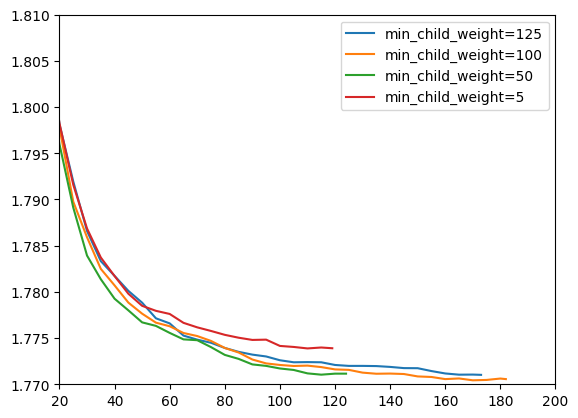

In [131]:
for key, sc_df in mcw_scores.items():
    plt.plot(sc_df.iter, sc_df.val_rmse, label=key)
plt.legend()

plt.xlim(20, 200)  # Zoom in on the x-axis from iteration 0 to 100
plt.ylim(1.77, 1.81)  # Zoom in on the y-axis for better visualization of RMSE differences

plt.show()

In [ ]:
min_child_weight = 100

## Final Model


In [132]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 10,
    'min_child_weight': 100,

    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',

    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
    'lambda': 1,      # L2 regularization 
    'alpha': 1,       # L1 regularization 
}
model = xgb.train(
    xgb_params, 
    dtrain, 
    num_boost_round=200
) 

In [133]:
y_pred = model.predict(dval)
root_mean_squared_error(y_val, y_pred)

np.float64(1.770450470342537)

In [134]:
df_full_train = df_full_train.reset_index(drop=True)
df_full_train.head()

,title,vote_average,vote_count,status,revenue,runtime,adult,budget,original_title,overview,popularity,genres,production_companies,production_countries,spoken_languages,keywords,release_year
0,Double Agent,4.600,4.0,Released,4.340372e+07,91.0,False,1.006521e+07,Double Agent,International spy Jason Starr disappears follo...,2.468,"TV Movie, Family, Action, Comedy","Mark H. Ovitz Productions, Disney Branded Tele...",United States of America,English,"family secrets, twin brother",1987.0
1,Kokowääh 2,6.026,170.0,Released,4.340372e+07,120.0,False,1.006521e+07,Kokowääh 2,Who said a patchwork family is without problem...,8.239,Comedy,"Barefoot Films, Béla Jarzyk Production",Germany,German,,2013.0
2,Home Movies,5.300,23.0,Released,4.340372e+07,90.0,False,1.006521e+07,Home Movies,A cult guru urges a shy disciple to make life ...,2.433,Comedy,SLC,United States of America,English,movie business,1980.0
3,Ambrose's First Falsehood,4.200,4.0,Released,4.340372e+07,10.0,False,1.006521e+07,Ambrose's First Falsehood,"After running into a friend and two ladies, a ...",1.382,Comedy,Keystone Film Company,United States of America,,,1914.0
4,The New Spirit,5.500,22.0,Released,4.340372e+07,7.0,False,1.006521e+07,The New Spirit,Animated documentary promoting timely filing a...,2.040,"Documentary, Animation","U.S. Department of Treasury, Walt Disney Produ...",United States of America,English,"propaganda, wartime, taxes, educational, short...",1942.0


In [135]:
y_full_train = df_full_train.vote_average.values
y_full_train

array([4.6  , 6.026, 5.3  , ..., 7.   , 8.   , 6.5  ])

In [136]:
del df_full_train['vote_average']
df_full_train.head(2)

,title,vote_count,status,revenue,runtime,adult,budget,original_title,overview,popularity,genres,production_companies,production_countries,spoken_languages,keywords,release_year
0,Double Agent,4.0,Released,4.340372e+07,91.0,False,1.006521e+07,Double Agent,International spy Jason Starr disappears follo...,2.468,"TV Movie, Family, Action, Comedy","Mark H. Ovitz Productions, Disney Branded Tele...",United States of America,English,"family secrets, twin brother",1987.0
1,Kokowääh 2,170.0,Released,4.340372e+07,120.0,False,1.006521e+07,Kokowääh 2,Who said a patchwork family is without problem...,8.239,Comedy,"Barefoot Films, Béla Jarzyk Production",Germany,German,,2013.0


In [137]:
hasher = FeatureHasher(n_features=50, input_type='dict')

full_train_dicts = df_full_train.to_dict(orient='records')
test_dicts = df_test.to_dict(orient='records')

X_full_train = hasher.fit_transform(full_train_dicts)
X_test = hasher.transform(test_dicts)

X_full_train_dense = X_full_train.toarray()
num_features = X_full_train_dense.shape[1]
features = [f"f_{i}" for i in range(num_features)]

In [138]:
dfulltrain = xgb.DMatrix(
    X_full_train,
    label=y_full_train,
    feature_names=features
)

dtest = xgb.DMatrix(
    X_test,
    label=y_test,
    feature_names=features
)

In [180]:
# xgb_params = {
#     'eta': 0.1,
#     'max_depth': 10,
#     'min_child_weight': 125,

#     'objective': 'reg:squarederror',
#     'eval_metric': 'rmse',

#     'nthread': 8,

#     'seed': 1,
#     'verbosity': 1,
#     'lambda': 1,      # L2 regularization 
#     'alpha': 1,       # L1 regularization 
# }

xgb_params = {
    "eta": 0.1,
    "max_depth": 7,  
    "min_child_weight": 25, 
    "objective": "reg:squarederror",
    "eval_metric": "rmse",
    "nthread": 8,
    "seed": 1,
    "verbosity": 1,
    "lambda": 1,  # L2 regularization
    "alpha": 1,   # L1 regularization
}
model = xgb.train(
    xgb_params, 
    dfulltrain, 
    num_boost_round=200
) 

In [181]:
y_pred = model.predict(dtest)
root_mean_squared_error(y_test, y_pred)

np.float64(1.774963610560603)

In [184]:
import json
json.dumps(df_full_train.iloc[33].to_dict())

'{"title": "Cold River", "vote_count": 1.0, "status": "Released", "revenue": 43403720.66610969, "runtime": 94.0, "adult": false, "budget": 10065207.438372264, "original_title": "Cold River", "overview": "Based on the novel Winterkill, by William Judson, Cold River is the story of an Adirondack guide who takes his young daughter and step-son on a long camping trip in the fall of 1932. When winter strikes unexpectedly early (a natural phenomenon known as a \'winterkill\' - so named because the animals are totally unprepared for a sudden, early winter, and many freeze or starve to death), a disastrous turn of events leaves the two children to find their own way home without food, or protection from the elements.", "popularity": 1.5, "genres": "Adventure", "production_companies": "", "production_countries": "United States of America", "spoken_languages": "English", "keywords": "winter, camping", "release_year": 1982.0}'

In [185]:
df[df.title == 'Cold River']

,title,vote_average,vote_count,status,revenue,runtime,adult,budget,original_title,overview,popularity,genres,production_companies,production_countries,spoken_languages,keywords,release_year
278610,Cold River,7.0,1.0,Released,4.340372e+07,94.0,False,1.006521e+07,Cold River,"Based on the novel Winterkill, by William Juds...",1.5,Adventure,,United States of America,English,"winter, camping",1982.0


In [186]:
import requests

In [187]:
movie = df_full_train.iloc[33].to_dict()

host = "0.0.0.0:9696"
response = requests.post(
    url=f'http://{host}/rate',
    json=movie
)

response


<Response [200]>

In [188]:
response.json()

{'movie_title': 'Cold River', 'predicted_rating': 6.565333843231201}

In [196]:
movie = df_full_train[df_full_train.title == 'Laserblast'].to_dict(orient='records')[0]

host = "0.0.0.0:9696"
response = requests.post(
    url=f'http://{host}/rate',
    json=movie
)

response.json()

{'movie_title': 'Laserblast', 'predicted_rating': 6.485314846038818}

In [193]:
movie = df_full_train[df_full_train.title == 'Laserblast'].to_dict(orient='records')
movie

[{'title': 'Laserblast',
  'vote_count': 87.0,
  'status': 'Released',
  'revenue': 43403720.66610969,
  'runtime': 85.0,
  'adult': False,
  'budget': 10065207.438372264,
  'original_title': 'Laserblast',
  'overview': 'Loner teenager Billy Duncan stumbles across a lost alien ray gun while wandering the desert one day. Billy uses the destructive weapon to get revenge on his enemies, but quickly finds himself beginning to turn into a violent, alien creature who destroys anyone who offends him.',
  'popularity': 7.512,
  'genres': 'Science Fiction, Horror',
  'production_companies': 'Selected Pictures, Charles Band Productions, The Irwin Yablans Company, Full Moon Features',
  'production_countries': 'United States of America',
  'spoken_languages': 'English',
  'keywords': 'spacecraft, laser gun, mutation, alien life-form, alien, stop motion, desert, exploding car, machine gun, pinball machine, comforting, forceful',
  'release_year': 1978.0}]

In [197]:
df_full_train.iloc[33].to_dict()


{'title': 'Cold River',
 'vote_count': 1.0,
 'status': 'Released',
 'revenue': 43403720.66610969,
 'runtime': 94.0,
 'adult': False,
 'budget': 10065207.438372264,
 'original_title': 'Cold River',
 'overview': "Based on the novel Winterkill, by William Judson, Cold River is the story of an Adirondack guide who takes his young daughter and step-son on a long camping trip in the fall of 1932. When winter strikes unexpectedly early (a natural phenomenon known as a 'winterkill' - so named because the animals are totally unprepared for a sudden, early winter, and many freeze or starve to death), a disastrous turn of events leaves the two children to find their own way home without food, or protection from the elements.",
 'popularity': 1.5,
 'genres': 'Adventure',
 'production_companies': '',
 'production_countries': 'United States of America',
 'spoken_languages': 'English',
 'keywords': 'winter, camping',
 'release_year': 1982.0}